# Brief overview of seawater equation of state

The equation of state relates in situ density with temperature, salinity and pressure.

\begin{align}
\rho = \rho(temperature, salinity, p)
\end{align}

It turns out, there are multiple definition of density, temperature and salinity (details found [here](http://www.teos-10.org)). 

The temperature measured by thermometers is called the in situ temperature. 

The density required to compute the Archimedes' force on an underwater float is called the in situ density.

In [1]:
import pickle
import gsw
import matplotlib.pyplot as plt

We load a profile collected during a field campaign that took place in the mediterranean sea in september 2018.

In [2]:
dp = pickle.load(open( '../data/ctd/CTD4.p', 'rb' ))
d = dp['d']
d = d[d.index>1]
d.head()

,pressure,temperature,salinity,conductivity,flag
pressure,,,,,
2.0,1.923875,24.519125,38.384763,57.055303,0.0
3.0,2.890562,24.517131,38.384600,57.053255,0.0
4.0,4.107000,24.513594,38.384338,57.049486,0.0
5.0,4.878250,24.512600,38.384325,57.048744,0.0
6.0,6.094813,24.508900,38.384369,57.045169,0.0


Text(0.5,0,'PSU')

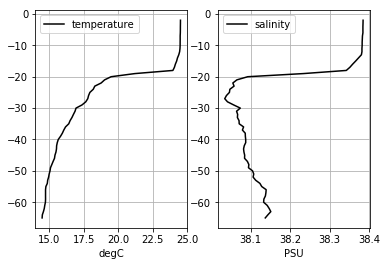

In [3]:
#d.plot(subplots=True)
ax=plt.subplot(121)
ax.plot(d['temperature'],-d.index,'k',label='temperature')
ax.legend()
ax.grid()
ax.set_xlabel('degC')
ax=plt.subplot(122)
ax.plot(d['salinity'],-d.index,'k',label='salinity')
ax.legend()
ax.grid()
ax.set_xlabel('PSU')

In [4]:
# derive absolute salinity and conservative temperature
lon, lat = 6., 42.5
p = d.index
SA = gsw.SA_from_SP(d['salinity'], p, lon, lat)
CT = gsw.CT_from_t(SA, d['temperature'], p)

---

We compute next the true in situ density and compare it with that ignoring temperature, salinity and pressure variations

In [5]:
# compute in situ density
rho = gsw.density.rho(SA, CT, p)

In [6]:
# compute density for constant temperature
rho_noT = gsw.density.rho(SA, CT[0]+0.*CT, p)
# compute density for constant salinity
rho_noS = gsw.density.rho(SA[0]+0.*SA, CT, p)
# compute density for constant pressure
rho_nop = gsw.density.rho(SA, CT, p[0]+0.*p)

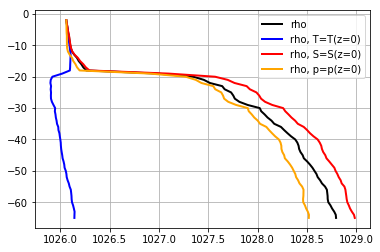

In [7]:
plt.figure()

plt.plot(rho, -p, 'k', lw=2, label='rho')
plt.plot(rho_noT, -p, 'blue', lw=2, label='rho, T=T(z=0)')
plt.plot(rho_noS, -p, 'red', lw=2, label='rho, S=S(z=0)')
plt.plot(rho_nop, -p, 'orange', lw=2, label='rho, p=p(z=0)')
plt.grid()
plt.legend()

Temperature dominates the seawater density in the present case with minor contributions from pressure and salinity

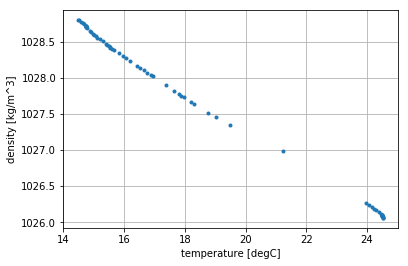

In [8]:
ax = plt.subplot(111)
ax.plot(d['temperature'], rho, '.', lw=2)
ax.set_xlabel('temperature [degC]')
ax.set_ylabel('density [kg/m^3]')
ax.grid()

We use ENSTA's float volume to quantify in mg the equivalent mass change associated with hydrography

Text(0.5,1,'equivalent mass change [mg] for a 5.6e+03 cm^3')

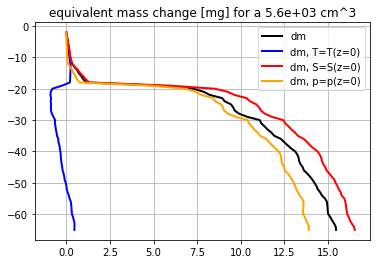

In [9]:
V = 5.65e+03 # cm^3 / milliliters

sc = 1e-3
ax = plt.subplot(111)
ax.plot((rho-rho[0])*V*sc, -p, 'k', lw=2, label='dm')
ax.plot((rho_noT-rho_noT[0])*V*sc, -p, 'blue', lw=2, label='dm, T=T(z=0)')
ax.plot((rho_noS-rho_noS[0])*V*sc, -p, 'red', lw=2, label='dm, S=S(z=0)')
ax.plot((rho_nop-rho_nop[0])*V*sc, -p, 'orange', lw=2, label='dm, p=p(z=0)')
ax.grid()
ax.legend()
ax.set_title('equivalent mass change [mg] for a %.1e cm^3'%V)

In [10]:
# derivatives
rho, alpha, beta = gsw.rho_alpha_beta(SA, CT, p)
rho_SA, rho_CT, rho_P = gsw.rho_first_derivatives(SA, CT, p)
print('drho/dSA = %.1e (kg/m^3)/(g/kg)' %rho_SA.mean())
print('drho/dCT = %.1e (kg/m^3)/degC' %rho_CT.mean())
print('drho/dP = %.1e (kg/m^3)/dbar' %(rho_P.mean()/1e-4))

drho/dSA = 7.5e-01 (kg/m^3)/(g/kg)
drho/dCT = -2.5e-01 (kg/m^3)/degC
drho/dP = 4.3e-03 (kg/m^3)/dbar
